<a href="https://colab.research.google.com/github/safi50/Benchmarking-Experiments-and-ML-Pipelines/blob/main/BenchMarking_Classification_Architectures_on_CIFAR10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB7
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import VGG16



## Loading Dataset

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
len(x_train),len(x_test),len(y_train),len(y_test)

(50000, 10000, 50000, 10000)

## Pre-Processing

In [4]:
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0],y_train.shape)
print(x_train[0].shape)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] (50000, 10)
(32, 32, 3)


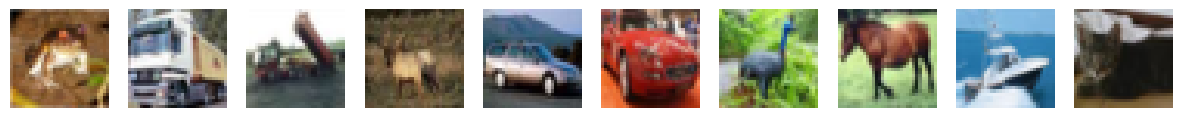

In [5]:
# Display some sample images from the dataset
fig, axes = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()

### Since inceptionV3 requires the minimum input size to be (75x75), we resize the dataset first

Shape of x_train_resized: (50000, 75, 75, 3)
Shape of y_train: (50000, 10)


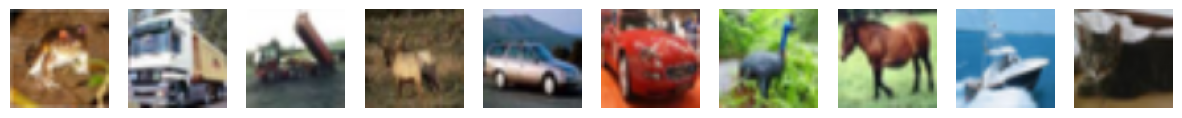

In [6]:
# Resize images to 75x75
x_train_resized = tf.image.resize(x_train, (75, 75))
x_test_resized = tf.image.resize(x_test, (75, 75))

#visualize
# Print the shape of resized images and one-hot encoded labels
print("Shape of x_train_resized:", x_train_resized.shape)
print("Shape of y_train:", y_train.shape)

# Display some sample images from the resized dataset
fig, axes = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    axes[i].imshow(x_train_resized[i])
    axes[i].axis('off')
plt.show()

## Creating a CNN

In [7]:
def My_CNN():
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
  ])
    return cnn_model



## Defining Models

In [8]:
def create_vgg():
    return VGG16(weights=None, input_shape=(32, 32, 3), classes=10)

def create_resnet():
    return ResNet50(weights=None, input_shape=(32, 32, 3), classes=10)

def create_inception():
    return InceptionV3(weights=None, input_shape=(75, 75, 3), classes=10)

def create_efficientnetb0():
    return EfficientNetB0(weights=None, input_shape=(32, 32, 3), classes=10)

def create_efficientnetb7():
    return EfficientNetB7(weights=None, input_shape=(32, 32, 3), classes=10)

models = {
    "MyCNN": My_CNN(),
    "VGG16": create_vgg(),
    "ResNet50": create_resnet(),
    "InceptionV3": create_inception(),
    "EfficientNetB0": create_efficientnetb0(),
    "EfficientNetB7": create_efficientnetb7()
}


In [9]:
def train_model(model, x_train, y_train, epochs=10, batch_size=64):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    return history

def evaluate_model(model, x_test, y_test):
    scores = model.evaluate(x_test, y_test, verbose=0)
    return scores[1]  # Return the accuracy


In [10]:
results = {}
histories = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    if "Inception" in model_name:
        history = train_model(model, x_train_resized, y_train)
        accuracy = evaluate_model(model, x_test_resized, y_test)
    else:
        history = train_model(model, x_train, y_train)
        accuracy = evaluate_model(model, x_test, y_test)

    results[model_name] = accuracy
    histories[model_name] = history

print("\nModel Performance Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")


Training MyCNN...
Epoch 1/10
625/625 [==============================] - 8s 6ms/step - loss: 1.7555 - accuracy: 0.3452 - val_loss: 1.4113 - val_accuracy: 0.4819
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 1.3992 - accuracy: 0.4967 - val_loss: 1.2297 - val_accuracy: 0.5621
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 1.2461 - accuracy: 0.5554 - val_loss: 1.1435 - val_accuracy: 0.5908
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 1.1170 - accuracy: 0.6038 - val_loss: 1.0549 - val_accuracy: 0.6316
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 1.0376 - accuracy: 0.6342 - val_loss: 0.9704 - val_accuracy: 0.6587
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.9757 - accuracy: 0.6600 - val_loss: 0.9771 - val_accuracy: 0.6643
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.9112 - accuracy: 0.6806 - val_loss: 0.9192 - val_accur

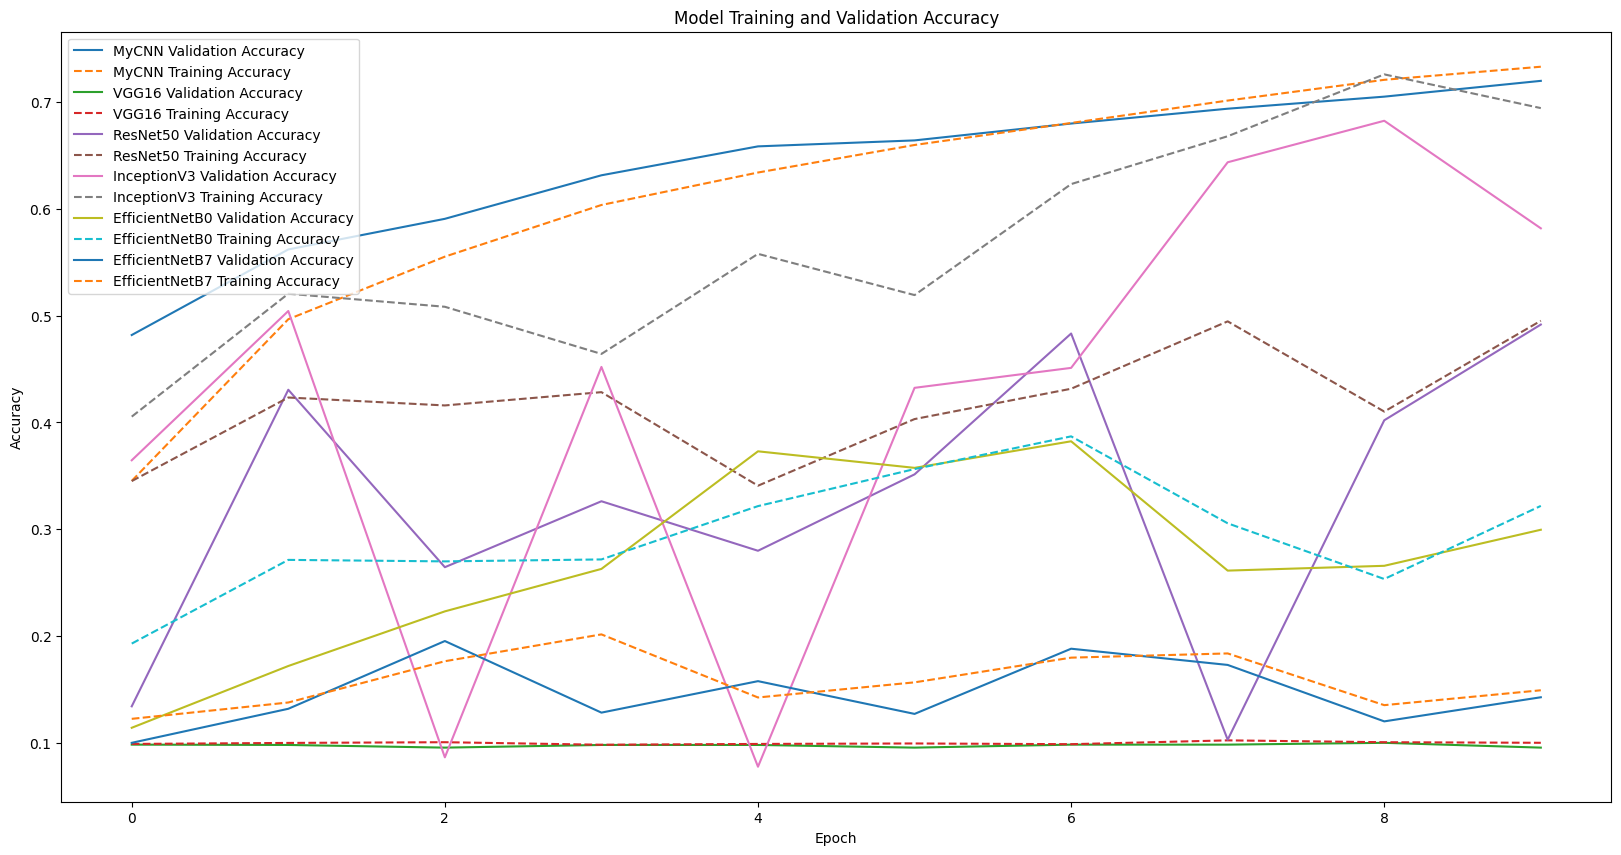

In [11]:
def plot_histories(histories):
    plt.figure(figsize=(20, 10))

    for model_name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')
        plt.plot(history.history['accuracy'], label=f'{model_name} Training Accuracy', linestyle='--')

    plt.title('Model Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_histories(histories)
